In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud
import datetime

In [2]:
# Cargamos el df
BW_df = pd.read_csv('./Maps_opiniones.csv', encoding = "utf8")
BW_df

,Unnamed: 0,Usuario,Fecha,Descripción,Calificacion
0,0,Andrea Guerrero Rojo,2 semanas atrás en Google,"Hermoso lugar, que te transporta a otro tiempo...",5/5
1,1,Alejo Reyes,una semana atrás en Google,Es un Hotel excelente donde su personal siempr...,5/5
2,2,Miguel Angel Guerrero Vázquez,2 semanas atrás en Google,Muy atentos y educados. Me decepcionó la comid...,3/5
3,3,adrian varela,2 semanas atrás en Google,Tal vez la excelente ubicación hace que dejen ...,3/5
4,4,Nicola Giuliato,hace 1 día en Google,Vista fantástica del Zócalo y de la Catedral. ...,3/5
...,...,...,...,...,...
795,795,lucy lu,2 años atrás en Google,NaN,5/5
796,796,Yoshoa Esteban,2 años atrás en Google,NaN,5/5
797,797,Verónica Zendejas Ángeles,un año atrás en Google,NaN,4/5
798,798,alejandro segura,hace 4 meses en Google,NaN,5/5


In [3]:
# Vemos la información del dataset
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    800 non-null    int64 
 1   Usuario       800 non-null    object
 2   Fecha         800 non-null    object
 3   Descripción   780 non-null    object
 4   Calificacion  800 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.4+ KB


In [4]:
# Buscamos los 3  datos faltantes
BW_df[BW_df["Descripción"].isna()]

,Unnamed: 0,Usuario,Fecha,Descripción,Calificacion
780,780,GABRIELA ROCHIN G.,un año atrás en Google,NaN,5/5
781,781,Giovanni Faraci Vallejo,2 años atrás en Google,NaN,4/5
782,782,Tro yal,2 años atrás en Google,NaN,5/5
783,783,Judith Muñoz,hace 4 meses en Google,NaN,5/5
784,784,David Cid,un año atrás en Google,NaN,5/5
785,785,Dr. Wario,un año atrás en Google,NaN,3/5
786,786,Fernando Camacho,2 años atrás en Google,NaN,4/5
787,787,Vivian Maldonado,un año atrás en Google,NaN,5/5
788,788,Pilar Guevara Gasca,3 años atrás en Google,NaN,5/5
789,789,Javier Rodriguez,un año atrás en Google,NaN,5/5


In [5]:
# Rellenamos con los datos más proximo superior (ffill), podríamos tambien hacerlo con el dato más próximo inferior (backfill)
BW_df.dropna(inplace = True)

In [6]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
calificaciones = []
for cali in BW_df['Calificacion']:
    calificaciones.append(cali[0])

In [7]:
BW_df["Calificacion"] = calificaciones

In [8]:
BW_df["Calificacion"] = BW_df["Calificacion"].astype(int)

In [9]:
BW_df

,Unnamed: 0,Usuario,Fecha,Descripción,Calificacion
0,0,Andrea Guerrero Rojo,2 semanas atrás en Google,"Hermoso lugar, que te transporta a otro tiempo...",5
1,1,Alejo Reyes,una semana atrás en Google,Es un Hotel excelente donde su personal siempr...,5
2,2,Miguel Angel Guerrero Vázquez,2 semanas atrás en Google,Muy atentos y educados. Me decepcionó la comid...,3
3,3,adrian varela,2 semanas atrás en Google,Tal vez la excelente ubicación hace que dejen ...,3
4,4,Nicola Giuliato,hace 1 día en Google,Vista fantástica del Zócalo y de la Catedral. ...,3
...,...,...,...,...,...
775,775,Ana Carolina,4 años atrás en Google,(Traducción de Google) HERMOSA\n\n(Original)\n...,5
776,776,Robert Alexander,6 años atrás en Google,(Traducción de Google) Exquisito\n\n(Original)...,5
777,777,Pati Montiel,6 años atrás en Google,(Traducción de Google) Ta culey\n\n(Original)\...,2
778,778,Just KC,7 años atrás en Google,(Traducción de Google) Tomé una copa en el res...,1


In [11]:
# Eliminamos la columna Unnamed
BW_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [50]:
# procesamos las fechas
palabras = ["Google", "en", "atrás", "hace", "Hoteles.com", "Expedia.mx", "Travelocity.com", "Orbitz.com", "Trip.com", "Ebookers.com"]
fechas = []

for fecha in BW_df["Fecha"]:
    lista = fecha.split()
    fechas_en_lista = [palabra for palabra in lista if palabra not in palabras]
    fechas.append(" ". join(fechas_en_lista))

In [51]:
fechas_corr = []
for fech in fechas:
    fechas_corr.append(fech.replace("una", "1").replace("un", "1").replace("años", "año").replace("meses", "mes").replace("semanas", "semana").replace("días", "día"))
    

fechas_corr

['2 semana',
 '1 semana',
 '2 semana',
 '2 semana',
 '1 día',
 '4 semana',
 '2 semana',
 '6 mes',
 '3 semana',
 '1 día',
 '1 día',
 '3 semana',
 '6 mes',
 '1 año',
 '1 año',
 '3 mes',
 '1 año',
 '6 mes',
 '2 año',
 '1 mes',
 '1 mes',
 '2 mes',
 '4 mes',
 '4 mes',
 '1 año',
 '1 año',
 '2 año',
 '3 mes',
 '2 año',
 '4 año',
 '5 mes',
 '2 año',
 '4 año',
 '2 año',
 '5 mes',
 '1 año',
 '4 año',
 '4 mes',
 '2 año',
 '2 año',
 '1 año',
 '4 mes',
 '3 mes',
 '3 año',
 '10 mes',
 '1 año',
 '9 mes',
 '2 año',
 '2 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '2 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '2 año',
 '1 año',
 '1 año',
 '10 mes',
 '1 año',
 '1 año',
 '10 mes',
 '1 año',
 '1 año',
 '1 año',
 '4 mes',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '8 mes',
 '1 año',
 '1 año',
 '1 año',
 '2 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '3 año',
 '1 año',
 '3 año',
 '1 año',
 '1 año',
 '3 año',
 '1 año',
 '1 año',
 '1

In [52]:
ahora = datetime.datetime.now()
print(ahora)

2021-04-05 15:21:03.112375


In [53]:
resta = ahora - datetime.timedelta(days = 1)
print(resta)

2021-04-04 15:21:03.112375


In [54]:
# poner la fecha
fechas_de_publicacion = []
for i, tiempo in enumerate(fechas_corr):
    lista_fecha = tiempo.split()
    
    if lista_fecha[1] == "día":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "semana":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto*7)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "mes":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto*30)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "año":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto*365)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "horas":
        date = ahora - datetime.timedelta(days = 1)
        fechas_de_publicacion.append(date)
        
    else:
        print(lista_fecha[1])

In [59]:
fechas_de_publicacion[0]

datetime.datetime(2021, 3, 22, 15, 21, 3, 112375)

In [73]:
year = []
month = []
for mes_año in fechas_de_publicacion:
    year.append(mes_año.strftime('%Y'))
    month.append(mes_año.strftime('%m'))

In [92]:
meses_num = []
for mes in month:
    if mes[0] == str(0):
        meses_num.append(mes[1])
    else:
        meses_num.append(mes)

In [93]:
meses = {"enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6, "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12}

In [94]:
meses_num

['3',
 '3',
 '3',
 '3',
 '4',
 '3',
 '3',
 '10',
 '3',
 '4',
 '4',
 '3',
 '10',
 '4',
 '4',
 '1',
 '4',
 '10',
 '4',
 '3',
 '3',
 '2',
 '12',
 '12',
 '4',
 '4',
 '4',
 '1',
 '4',
 '4',
 '11',
 '4',
 '4',
 '4',
 '11',
 '4',
 '4',
 '12',
 '4',
 '4',
 '4',
 '12',
 '1',
 '4',
 '6',
 '4',
 '7',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '6',
 '4',
 '4',
 '6',
 '4',
 '4',
 '4',
 '12',
 '4',
 '4',
 '4',
 '4',
 '4',
 '8',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '10',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',

In [96]:
# Agregamos al dataset
BW_df["Año"] = year
BW_df["Mes"] = month

In [98]:
# Eliminamos la fecha que ya no nos sirve
BW_df.drop("Fecha", axis = 1, inplace = True)

In [100]:
# Eliminamos los usurarios uya que en esta ocación no no será de gran ayuda
BW_df.drop("Usuario", axis = 1, inplace = True)

In [101]:
BW_df

,Descripción,Calificacion,Año,Mes
0,"Hermoso lugar, que te transporta a otro tiempo...",5,2021,03
1,Es un Hotel excelente donde su personal siempr...,5,2021,03
2,Muy atentos y educados. Me decepcionó la comid...,3,2021,03
3,Tal vez la excelente ubicación hace que dejen ...,3,2021,03
4,Vista fantástica del Zócalo y de la Catedral. ...,3,2021,04
...,...,...,...,...
775,(Traducción de Google) HERMOSA\n\n(Original)\n...,5,2017,04
776,(Traducción de Google) Exquisito\n\n(Original)...,5,2015,04
777,(Traducción de Google) Ta culey\n\n(Original)\...,2,2015,04
778,(Traducción de Google) Tomé una copa en el res...,1,2014,04


In [102]:
# Concideraremos que las calificaciones mayores o iguales a 4 quiere decir que es un buen hotel (1) y menos a 4 malos (0)
retroalimentacion = []
for i in BW_df["Calificacion"]:
    if i >= 4:
        retroalimentacion.append(1)
    else:
        retroalimentacion.append(0)
        
BW_df["retroalimentacion"] = retroalimentacion

In [104]:
sns.set_style('whitegrid')

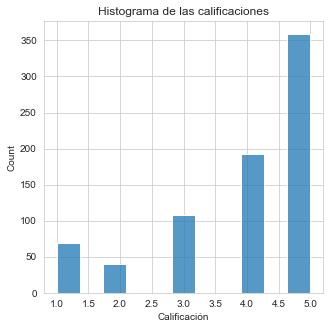

In [107]:
# Empezamos a hacer una representación gráfica de los datos que tenemos para intentar encontrar dtos interesantes
# Histograma de las calificaciones
plt.figure(figsize = (5,5))
sns.histplot(x = "Calificacion", data = BW_df[BW_df["Calificacion"] <= 5])
plt.title("Histograma de las calificaciones")
plt.xlabel("Calificación")
plt.show()

In [112]:
# Pocerntaje de calificación
TOTAL_OPINIONES = BW_df.shape[0]
for i in range(1,6):
    procentaje = BW_df[BW_df["Calificacion"] == i].shape[0] / TOTAL_OPINIONES
    print("Porcentaje con calificación {} es {:.2f}%".format(i, procentaje*100))

print("Es bueno 70.77%")
print("Debe mejorar 29.23%")

Porcentaje con calificación 1 es 8.85%
Porcentaje con calificación 2 es 5.13%
Porcentaje con calificación 3 es 13.85%
Porcentaje con calificación 4 es 24.74%
Porcentaje con calificación 5 es 46.03%
Es bueno 70.77%
Debe mejorar 29.23%


In [118]:
BW_df["Año"] = BW_df["Año"].astype(int)
BW_df["Mes"] = BW_df["Mes"].astype(int)

In [115]:
# Eliminamos la calificación ya que tenemos ahora la retroalimentación para guiarnos
BW_df.drop("Calificacion", axis = 1, inplace = True)

<AxesSubplot:>

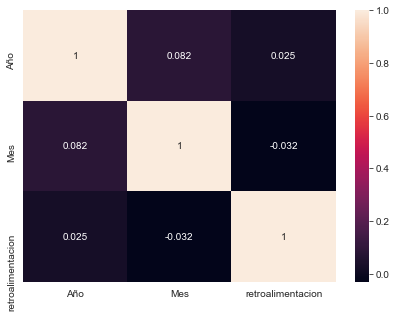

In [119]:
# Haremós un mpa de correlación para ver si hay alguna relación núemrica que aún no hayamos visto
corr = BW_df.corr()

plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True)

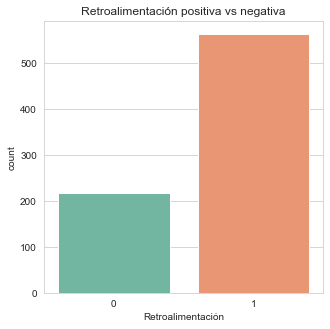

In [120]:
# Viendo de otra manera las críticas del hotel
plt.figure(figsize = (5,5))
sns.countplot(x = "retroalimentacion", data = BW_df, palette = "Set2")
plt.title("Retroalimentación positiva vs negativa")
plt.xlabel("Retroalimentación")
plt.show()

Text(0.5, 0, 'Año')

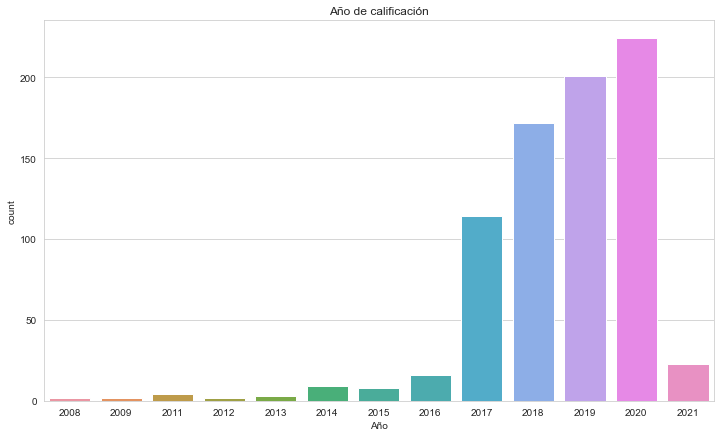

In [122]:
# ¿De que año son las criticas?
plt.figure(figsize = (12,7))
sns.countplot(x = "Año", data =  BW_df)
plt.title("Año de calificación")
plt.xlabel("Año")

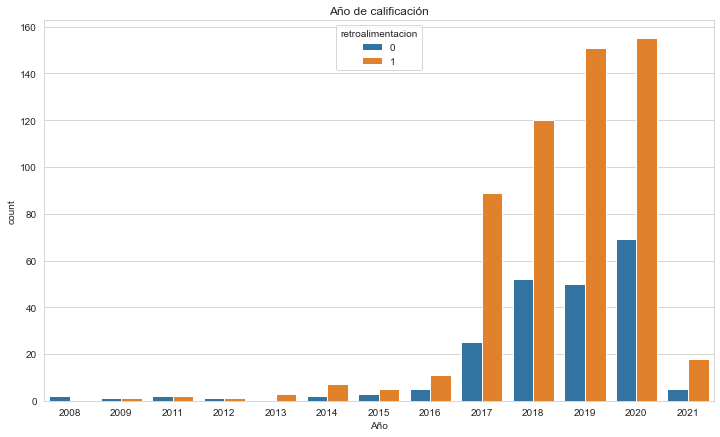

In [124]:
# ¿Hay una relevancia entre la retroalimentación y el año?
plt.figure(figsize = (12,7))
sns.countplot(x = "Año", data =  BW_df, hue = "retroalimentacion")
plt.title("Año de calificación")
plt.xlabel("Año")
plt.show()

Text(0.5, 1.0, 'Acumulación de las opiniones con respecto al año')

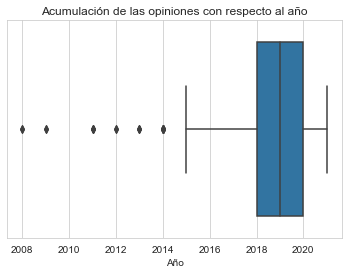

In [129]:
# Boxplot para ver en donde se acumulan las opiniones de los usuarios
sns.boxplot(x = "Año", data = BW_df)
plt.title("Acumulación de las opiniones con respecto al año")

In [130]:
# Procesamiento de los datos
# Las opiniones: Serán removidas las stopwords, los signos y lo números
# STOPWORDS
nltk.download('stopwords')
STOPWORDS_SPANISH = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [156]:
# Agregamos una palabra que seguro se repetirá mucho y no es necesaria "Hotel" y "Hoteles"
STOPWORDS_SPANISH.append("hotel")
STOPWORDS_SPANISH.append("hoteles")
STOPWORDS_SPANISH.append("traducción")
STOPWORDS_SPANISH.append("google")

In [157]:
# CARACTERES ESPECIALES
signos = list(string.punctuation)

In [158]:
# NUMEROS
numeros = list(["0","1","2","3","4","5","6","7","8","9"])

In [159]:
opiniones = []
for phrase in BW_df["Descripción"]:
    opinion = [word for word in phrase.split() if word.lower() not in STOPWORDS_SPANISH]
    opiniones.append(" ".join(opinion))

In [160]:
new_opiniones = []
for opinion in opiniones:
    sin_signos = [char for char in opinion if char not in signos]
    new_opiniones.append("".join(sin_signos))

In [161]:
clean_opinions = []
for opinion in new_opiniones:
    sin_num = [char for char in opinion if char not in numeros]
    clean_opinions.append("".join(sin_num))

In [162]:
# Sustituirimos la variable opinion con las nuevas
BW_df["Descripción"] = clean_opinions

In [163]:
BW_df

,Descripción,Año,Mes,retroalimentacion
0,Hermoso lugar transporta tiempo Atención formi...,2021,3,1
1,excelente personal siempre sonrisa buen trato ...,2021,3,1
2,atentos educados decepcionó comida comido mole...,2021,3,0
3,Tal vez excelente ubicación hace dejen poner a...,2021,3,0
4,Vista fantástica Zócalo Catedral Comida servic...,2021,4,0
...,...,...,...,...
775,HERMOSA Original LINDOS,2017,4,1
776,Exquisito Original Exquisite,2015,4,1
777,Ta culey Original Ta culey,2015,4,0
778,Tomé copa restaurante azotea café sabía agua i...,2014,4,0


In [164]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(BW_df["retroalimentacion"]):
    if cal == 1:
        buenas += BW_df["Descripción"][i]
    else:
        malas += BW_df["Descripción"][i]

In [165]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

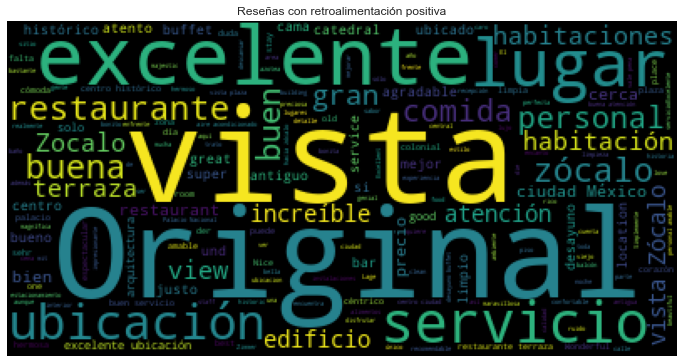

In [166]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

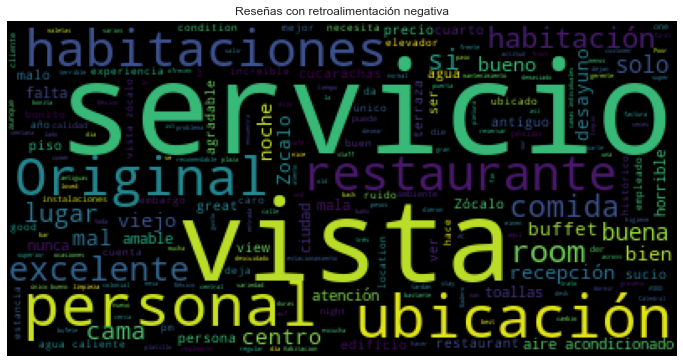

In [167]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [168]:
# Guardamos la información pre procesada
BW_df.to_csv("BW_preprocesado_maps.csv")